In [ ]:
# Upload kaggle.json and configure Kaggle API
from google.colab import files
import os, shutil, glob

files.upload()  # Upload kaggle.json
os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 600)

# Download BreaKHis dataset
import kagglehub
path = kagglehub.dataset_download("ambarish/breakhis")

# Set up dataset path
dataset_images_path = os.path.join(path, "BreaKHis_v1", "BreaKHis_v1", "histology_slides", "breast")
destination = "/content/breakhis_dataset"
if not os.path.exists(destination):
    shutil.copytree(dataset_images_path, destination)

# Check dataset structure
print("Dataset available at:", destination)
print("Top-level folders:", os.listdir(destination))

# Count images by class and magnification
benign_images = glob.glob(os.path.join(destination, "benign", "**", "*.png"), recursive=True)
malignant_images = glob.glob(os.path.join(destination, "malignant", "**", "*.png"), recursive=True)

magnifications = ["40X", "100X", "200X", "400X"]
image_counts = {mag: len(glob.glob(os.path.join(destination, "**", mag, "*.png"), recursive=True)) for mag in magnifications}

print(f"Benign images: {len(benign_images)}")
print(f"Malignant images: {len(malignant_images)}")
print(f"Total images: {len(benign_images) + len(malignant_images)}")
print("Image counts by magnification:", image_counts)


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nchaitri","key":"f854f74978bf31eed69e33bc72d1e006"}'}

In [ ]:
import os
import shutil

# Create the .kaggle folder and move kaggle.json there
os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set permissions
os.chmod("/root/.kaggle/kaggle.json", 600)

In [ ]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("ambarish/breakhis")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/breakhis


In [ ]:
import os

# Check the downloaded files
dataset_path = path  # This is the directory, not a ZIP file

# List all files and folders inside the dataset directory
files = os.listdir(dataset_path)
print("Files in dataset directory:", files)


Files in dataset directory: ['BreaKHis_v1', 'Folds.csv']


In [ ]:
import os

# Correct path to images
dataset_images_path = os.path.join(dataset_path,
                                   "BreaKHis_v1",
                                   "BreaKHis_v1",
                                   "histology_slides",
                                   "breast")

# Check if the path exists
if os.path.exists(dataset_images_path):
    print("Corrected dataset path:", dataset_images_path)
    print("Categories:", os.listdir(dataset_images_path))  # Should show ['malignant', 'benign']
else:
    print("Path not found!")


Corrected dataset path: /kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast
Categories: ['README.txt', 'benign', 'count_files.sh', 'malignant']


In [ ]:
import shutil

destination = "/content/breakhis_dataset"

if not os.path.exists(destination):
    shutil.copytree(dataset_images_path, destination)

print("Dataset is now available at:", destination)
print("Final structure:", os.listdir(destination))


Dataset is now available at: /content/breakhis_dataset
Final structure: ['count_files.sh', 'malignant', 'README.txt', 'benign']


In [ ]:
import os

# Check what exists inside /content/breakhis_dataset
dataset_path = "/content/breakhis_dataset"

print("Contents of dataset_path:", os.listdir(dataset_path))


Contents of dataset_path: ['count_files.sh', 'malignant', 'README.txt', 'benign']


In [ ]:
import os

dataset_path = "/content/breakhis_dataset"

for class_name in ["benign", "malignant"]:
    class_path = os.path.join(dataset_path, class_name)
    print(f"\nContents of {class_name}: {os.listdir(class_path)}")

    sob_path = os.path.join(class_path, "SOB")
    if os.path.exists(sob_path):
        print(f"\nContents of SOB folder in {class_name}: {os.listdir(sob_path)}")



Contents of benign: ['phyllodes_tumor.stat.txt', 'SOB', 'process_db_stat.py', 'README_B.txt', 'tubular_adenoma.stat.txt', 'adenosis.stat.txt', 'fibroadenoma.stat.txt']

Contents of SOB folder in benign: ['adenosis', 'fibroadenoma', 'tubular_adenoma', 'phyllodes_tumor']

Contents of malignant: ['SOB', 'ductal_carcinoma.stat.txt.SOB', 'process_db_stat.py', 'papillary_carcinoma.stat.txt', 'mucinous_carcinoma.stat.txt', 'ductal_carcinoma.stat.txt', 'lobular_carcinoma.stat.txt']

Contents of SOB folder in malignant: ['papillary_carcinoma', 'mucinous_carcinoma', 'ductal_carcinoma', 'lobular_carcinoma']


In [ ]:
import glob

dataset_path = "/content/breakhis_dataset"

# Find all PNG files in subdirectories
image_files = glob.glob(os.path.join(dataset_path, "**", "*.png"), recursive=True)

print("Found", len(image_files), "images.")
print("Sample file paths:", image_files[:5])  # Show first 5 images


Found 7909 images.
Sample file paths: ['/content/breakhis_dataset/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-15704/400X/SOB_M_PC-14-15704-400-001.png', '/content/breakhis_dataset/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-15704/400X/SOB_M_PC-14-15704-400-031.png', '/content/breakhis_dataset/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-15704/400X/SOB_M_PC-14-15704-400-016.png', '/content/breakhis_dataset/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-15704/400X/SOB_M_PC-14-15704-400-009.png', '/content/breakhis_dataset/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-15704/400X/SOB_M_PC-14-15704-400-022.png']


In [ ]:
import os

dataset_path = "/content/breakhis_dataset"

print("Benign subfolders:", os.listdir(os.path.join(dataset_path, "benign")))
print("Malignant subfolders:", os.listdir(os.path.join(dataset_path, "malignant")))


Benign subfolders: ['phyllodes_tumor.stat.txt', 'SOB', 'process_db_stat.py', 'README_B.txt', 'tubular_adenoma.stat.txt', 'adenosis.stat.txt', 'fibroadenoma.stat.txt']
Malignant subfolders: ['SOB', 'ductal_carcinoma.stat.txt.SOB', 'process_db_stat.py', 'papillary_carcinoma.stat.txt', 'mucinous_carcinoma.stat.txt', 'ductal_carcinoma.stat.txt', 'lobular_carcinoma.stat.txt']


In [ ]:
import os

dataset_path = "/content/breakhis_dataset"

# List directories inside the SOB folder
benign_sob_path = os.path.join(dataset_path, "benign", "SOB")
malignant_sob_path = os.path.join(dataset_path, "malignant", "SOB")

print("Benign SOB contents:", os.listdir(benign_sob_path))
print("Malignant SOB contents:", os.listdir(malignant_sob_path))


Benign SOB contents: ['adenosis', 'fibroadenoma', 'tubular_adenoma', 'phyllodes_tumor']
Malignant SOB contents: ['papillary_carcinoma', 'mucinous_carcinoma', 'ductal_carcinoma', 'lobular_carcinoma']


In [ ]:
import glob

magnifications = ["40X", "100X", "200X", "400X"]
image_counts = {}

for mag in magnifications:
    images = glob.glob(os.path.join(dataset_path, "**", mag, "*.png"), recursive=True)
    image_counts[mag] = len(images)

print("Image counts per magnification:", image_counts)


Image counts per magnification: {'40X': 1995, '100X': 2081, '200X': 2013, '400X': 1820}


In [ ]:
import glob

benign_images = glob.glob(os.path.join(dataset_path, "benign", "**", "*.png"), recursive=True)
malignant_images = glob.glob(os.path.join(dataset_path, "malignant", "**", "*.png"), recursive=True)

print(f"Benign images found: {len(benign_images)}")
print(f"Malignant images found: {len(malignant_images)}")
print(f"Total images found: {len(benign_images) + len(malignant_images)}")


Benign images found: 2480
Malignant images found: 5429
Total images found: 7909


In [ ]:
# Just a helper cell to reload ViT setup later
!pip install timm --quiet
import timm
import torch.nn as nn
vit_model = timm.create_model('vit_base_patch16_224', pretrained=True)
vit_model.head = nn.Linear(vit_model.head.in_features, 1)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Using device: cuda


Epoch 1: 100%|██████████| 198/198 [03:29<00:00,  1.06s/it]


Epoch 1/5, Loss: 0.2098


Epoch 2: 100%|██████████| 198/198 [03:28<00:00,  1.05s/it]


Epoch 2/5, Loss: 0.0714


Epoch 3: 100%|██████████| 198/198 [03:28<00:00,  1.05s/it]


Epoch 3/5, Loss: 0.0514


Epoch 4: 100%|██████████| 198/198 [03:28<00:00,  1.05s/it]


Epoch 4/5, Loss: 0.0093


Epoch 5: 100%|██████████| 198/198 [03:28<00:00,  1.05s/it]

Epoch 5/5, Loss: 0.0009



Test Accuracy: 98.99%

Classification Report:
              precision    recall  f1-score   support

      Benign       0.99      0.98      0.98       496
   Malignant       0.99      1.00      0.99      1086

    accuracy                           0.99      1582
   macro avg       0.99      0.99      0.99      1582
weighted avg       0.99      0.99      0.99      1582



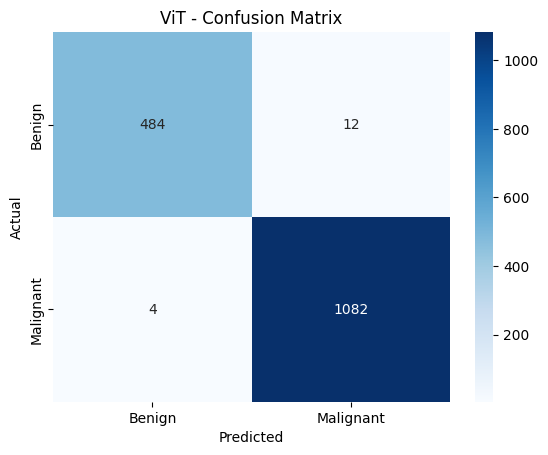

In [ ]:
# Install required packages if not already installed
!pip install timm --quiet

# Imports
import os
import glob
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from torch.utils.data import Dataset, DataLoader
import timm

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Dataset path
#dataset_path = "/content/breakhis_dataset"

# Define transformations
IMG_SIZE = 224
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load image paths and labels
data = []
for label in ["benign", "malignant"]:
    class_path = os.path.join(dataset_path, label, "SOB")
    if os.path.isdir(class_path):
        for subtype in os.listdir(class_path):
            subtype_path = os.path.join(class_path, subtype)
            if os.path.isdir(subtype_path):
                for sample in os.listdir(subtype_path):
                    sample_path = os.path.join(subtype_path, sample)
                    if os.path.isdir(sample_path):
                        for mag in ["40X", "100X", "200X", "400X"]:
                            mag_path = os.path.join(sample_path, mag)
                            if os.path.isdir(mag_path):
                                for img_file in glob.glob(os.path.join(mag_path, "*.png")):
                                    data.append([img_file, label, mag])

# Create DataFrame
df = pd.DataFrame(data, columns=["image_path", "label", "magnification"])
df["label"] = df["label"].map({"benign": 0, "malignant": 1})

# Split data
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)

# Custom Dataset class
class BreakHisDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx]["image_path"]
        label = self.dataframe.iloc[idx]["label"]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# Datasets and loaders
train_dataset = BreakHisDataset(train_df, transform=transform)
test_dataset = BreakHisDataset(test_df, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# Load ViT base model and modify head for binary classification
vit_model = timm.create_model('vit_base_patch16_224', pretrained=True)
vit_model.head = nn.Linear(vit_model.head.in_features, 1)
vit_model = vit_model.to(device)

# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(vit_model.parameters(), lr=3e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    vit_model.train()
    total_loss = 0
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        images, labels = images.to(device), labels.to(device, dtype=torch.float32)
        optimizer.zero_grad()
        outputs = vit_model(images).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    scheduler.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_loader):.4f}")

# Evaluation
vit_model.eval()
predictions, true_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device, dtype=torch.float32)
        outputs = vit_model(images).squeeze()
        preds = torch.sigmoid(outputs) > 0.5
        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Accuracy and metrics
acc = accuracy_score(true_labels, predictions)
print(f"\nTest Accuracy: {acc * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(true_labels, predictions, target_names=["Benign", "Malignant"]))

# Confusion matrix
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("ViT - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

from sklearn.metrics import roc_curve, roc_auc_score

# Probabilities
probs = torch.sigmoid(torch.tensor(outputs)).cpu().numpy()
fpr, tpr, _ = roc_curve(true_labels, probs)
roc_auc = roc_auc_score(true_labels, probs)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Install required packages if not already installed
!pip install timm --quiet

# Imports
import os
import glob
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from torch.utils.data import Dataset, DataLoader
import timm

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Dataset path
#dataset_path = "/content/breakhis_dataset"

# Define transformations
IMG_SIZE = 224
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load image paths and labels
data = []
for label in ["benign", "malignant"]:
    class_path = os.path.join(dataset_path, label, "SOB")
    if os.path.isdir(class_path):
        for subtype in os.listdir(class_path):
            subtype_path = os.path.join(class_path, subtype)
            if os.path.isdir(subtype_path):
                for sample in os.listdir(subtype_path):
                    sample_path = os.path.join(subtype_path, sample)
                    if os.path.isdir(sample_path):
                        for mag in ["40X", "100X", "200X", "400X"]:
                            mag_path = os.path.join(sample_path, mag)
                            if os.path.isdir(mag_path):
                                for img_file in glob.glob(os.path.join(mag_path, "*.png")):
                                    data.append([img_file, label, mag])

# Create DataFrame
df = pd.DataFrame(data, columns=["image_path", "label", "magnification"])
df["label"] = df["label"].map({"benign": 0, "malignant": 1})

# Split data
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)

# Custom Dataset class
class BreakHisDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx]["image_path"]
        label = self.dataframe.iloc[idx]["label"]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# Datasets and loaders
train_dataset = BreakHisDataset(train_df, transform=transform)
test_dataset = BreakHisDataset(test_df, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# Load ViT base model and modify head for binary classification
vit_model = timm.create_model('vit_base_patch16_224', pretrained=True)
vit_model.head = nn.Linear(vit_model.head.in_features, 1)
vit_model = vit_model.to(device)

# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(vit_model.parameters(), lr=3e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    vit_model.train()
    total_loss = 0
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        images, labels = images.to(device), labels.to(device, dtype=torch.float32)
        optimizer.zero_grad()
        outputs = vit_model(images).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    scheduler.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_loader):.4f}")

# Evaluation
vit_model.eval()
predictions, true_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device, dtype=torch.float32)
        outputs = vit_model(images).squeeze()
        preds = torch.sigmoid(outputs) > 0.5
        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Accuracy and metrics
acc = accuracy_score(true_labels, predictions)
print(f"\nTest Accuracy: {acc * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(true_labels, predictions, target_names=["Benign", "Malignant"]))

# Confusion matrix
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("ViT - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
